In [3]:
%run -i myimports.py   

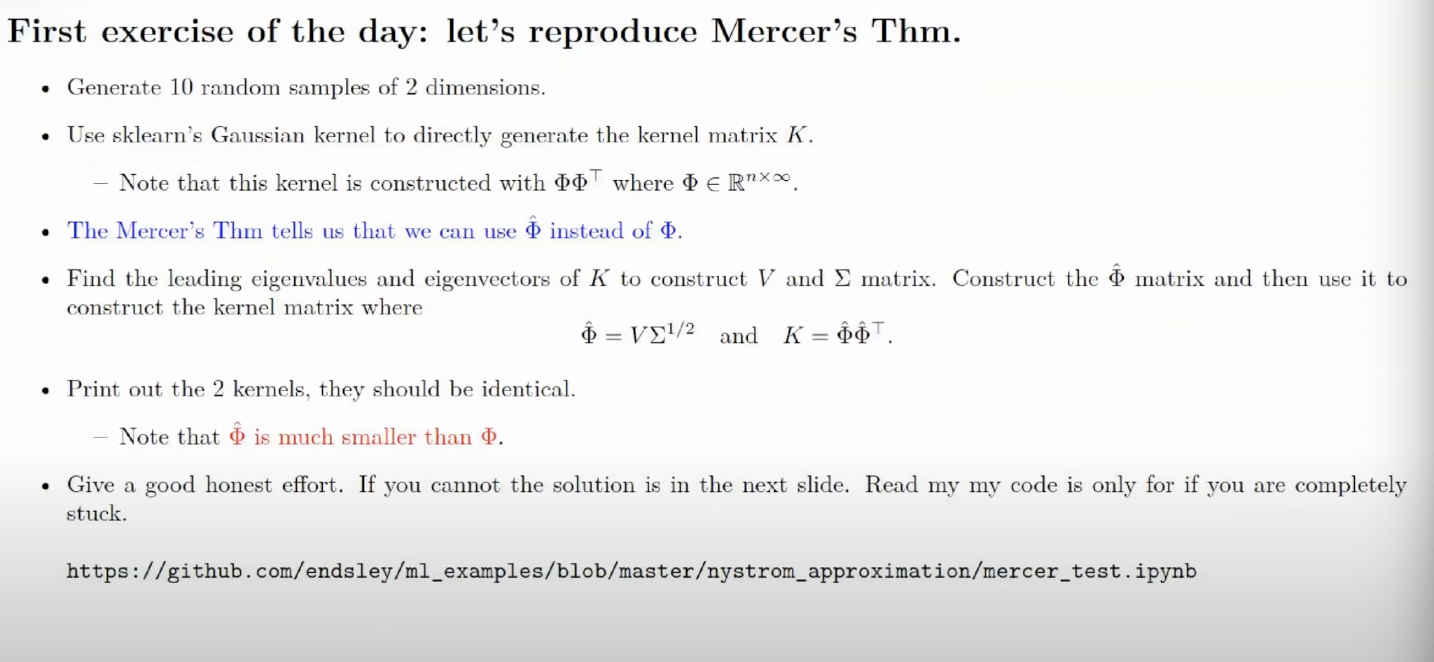

# Step 1: Generate 10 random samples in 2D

In [6]:
X = np.random.randn(10, 2)
print("X shape:", X.shape)
show_mat(X)

X shape: (10, 2)


<IPython.core.display.Math object>

# Step 2: Compute the Gaussian (RBF) kernel matrix K directly via sklearn


In [8]:
from sklearn.metrics.pairwise import rbf_kernel

gamma = 0.5
K_direct = rbf_kernel(X, X, gamma=gamma)
print("Direct kernel K_direct shape:", K_direct.shape)
show_mat(K_direct)


Direct kernel K_direct shape: (10, 10)


<IPython.core.display.Math object>

# Step 3: Eigen‑decompose K_direct to get leading eigenvalues & eigenvectors


In [13]:
eigvals, eigvecs = eigh(K_direct)

# flip order so that largest eigenvalues come first
eigvals = eigvals[::-1]
eigvecs = eigvecs[:, ::-1]

show_mat(eigvals, name="eigvals of K_direct")

<IPython.core.display.Math object>

In [15]:
# Optionally truncate—here we’ll keep all 7 (but in practice you might keep m << n)
m = 7
Λ = np.diag(eigvals[:m])
V = eigvecs[:, :m]

print("Top eigenvalues Λ:\n", eigvals[:m])
print("V (eigenvectors) shape:", V.shape, "\n")

Top eigenvalues Λ:
 [6.0065295  1.96463648 0.98868079 0.44845478 0.39812293 0.12863163
 0.05079962]
V (eigenvectors) shape: (10, 7) 



# Step 4: Construct the “feature” matrix Φ̂ = V Λ^{1/2}

In [16]:
Phi_hat = V @ np.sqrt(Λ)
print("Phi_hat shape:", Phi_hat.shape)
show_mat(Phi_hat, name="Phi_hat (approximate feature map)")

Phi_hat shape: (10, 7)


<IPython.core.display.Math object>

# Step 5: Reconstruct the kernel via Φ̂ Φ̂ᵀ and compare to the direct K


In [17]:
K_recon = Phi_hat @ Phi_hat.T

show_mat(K_recon, name="K_recon (reconstructed kernel matrix)")

<IPython.core.display.Math object>

In [18]:
show_mat(K_direct, name="K_direct (original kernel matrix)")

<IPython.core.display.Math object>

# Step 6: Check that K_direct and K_recon are (approximately) the same


In [20]:
diff = np.linalg.norm(K_direct - K_recon)
print(f"Frobenius norm of (K_direct - K_recon): {diff:.2e}")

Frobenius norm of (K_direct - K_recon): 1.07e-02
